In [370]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd

In [371]:
random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

   Feature1  Feature2  Target
0  2.067788  0.258133       1
1  0.993994 -0.609145       1
2 -0.690315  0.749921       0
3  1.023582  0.529003       0
4  0.700747 -0.496724       1

[5 rows x 3 columns]
(2, 500) (500,)


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


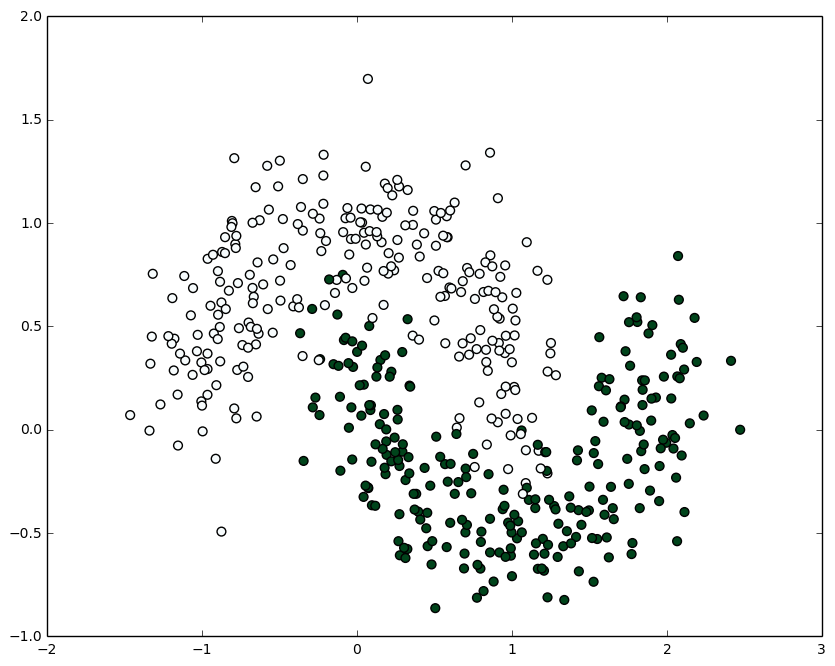

In [372]:
#read the datasets
train = pd.read_csv("intro_to_ann.csv")
print (train.head())
Xd, Yd = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])
Xbar=Xd.transpose()
Ybar=Yd.transpose()
print(Xbar.shape, Ybar.shape)
#print(X,Y)
plt.scatter(Xd[:,0], Xd[:,1], s=40, c=Yd, cmap=plt.cm.BuGn)

In [378]:
onehot = (np.arange(2) == Yd[:, None]).astype(np.float32)
#print(Yd[:, None])
#print(np.arange(2)==Y_data[:,None])
#print(onehot)
#print(onehot.shape)
n_hidden = 4.0 # 1st layer num features
n_input = 2.0 
x1=tf.placeholder("float",[None,2])
#x2=tf.placeholder("float",[None,1])
Y=tf.placeholder("float",[None,2])
b1=tf.Variable(tf.zeros([4]))
b2=tf.Variable(tf.zeros([2]))
#W1=tf.Variable(rng.randn(([n_input,n_hidden]))
W1=tf.Variable(tf.zeros([n_input,n_hidden]))
W2=tf.Variable(tf.zeros([n_hidden,2]))
#teta_=tf.placeholder(tf.float32,[None,4])
teta=tf.nn.sigmoid(tf.matmul(x1,W1)+b1)
#output_Teta=tf.placeholder(tf.float32,[None,1])
OutputTeta=tf.nn.sigmoid(tf.matmul(teta,W2)+b2)

In [379]:
cost=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(OutputTeta),reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [380]:
init = tf.initialize_all_variables()
#errors=[]
with tf.Session() as sess:
    sess.run(init)
    good=tf.equal(tf.argmax(OutputTeta,1),tf.argmax(Y,1))
    accuracy=tf.reduce_mean(tf.cast(good,tf.float32))
    for i in range(1000):
        sess.run(optimizer,feed_dict={x1:Xd,Y:Y1})
        Eval=sess.run(accuracy,feed_dict={x1:Xd,Y:Y1})
        errors.append(1-Eval)
        print(sess.run(W1),"\n",sess.run(W2))
        print("Error:",errors[-1])
            

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]] 
 [[ 0.01249999  0.01249999]
 [ 0.01249999  0.01249999]
 [ 0.01249999  0.01249999]
 [ 0.01249999  0.01249999]]
Error: 0.5
[[  7.46728547e-05   7.46728547e-05   7.46728547e-05   7.46728547e-05]
 [  3.76246935e-05   3.76246935e-05   3.76246935e-05   3.76246935e-05]] 
 [[ 0.02468756  0.02468756]
 [ 0.02468756  0.02468756]
 [ 0.02468756  0.02468756]
 [ 0.02468756  0.02468756]]
Error: 0.5
[[ 0.00021847  0.00021847  0.00021847  0.00021847]
 [ 0.00011008  0.00011008  0.00011008  0.00011008]] 
 [[ 0.03657189  0.03657215]
 [ 0.03657189  0.03657215]
 [ 0.03657189  0.03657215]
 [ 0.03657189  0.03657215]]
Error: 0.5
[[ 0.00042618  0.00042618  0.00042618  0.00042618]
 [ 0.00021474  0.00021474  0.00021474  0.00021474]] 
 [[ 0.0481621   0.04816308]
 [ 0.0481621   0.04816308]
 [ 0.0481621   0.04816308]
 [ 0.0481621   0.04816308]]
Error: 0.5
[[ 0.00069293  0.00069293  0.00069293  0.00069293]
 [ 0.00034914  0.00034914  0.00034914  0.00034914]] 
 [[ 0.05946719  0.05